In [30]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [31]:
data = pd.read_csv("./houseprice.csv")
numeric = ["int16", "int32", "int64", "float16","float32","float64"]
numeric_val = data.select_dtypes(include=numeric).columns
data = data[numeric_val]

In [3]:
data.shape

(1460, 38)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=["SalePrice","Id"],axis=1), data["SalePrice"],test_size=0.3, random_state=0)

In [33]:
X_train.shape,X_test.shape

((1022, 36), (438, 36))

In [38]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [39]:
model_full = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=10)

model_full.fit(X_train, y_train)

r2_full = r2_score(y_test, model_full.predict(X_test))

In [43]:
features = pd.Series(model_full.feature_importances_)
features.index = X_train.columns
features.sort_values(inplace=True, ascending=True)
features = list(features.index)

In [48]:
tol = 0.001
feature_to_remove = []
for feature in features:
    model_int = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=5)
    model_int.fit(X_train[feature_to_remove + [feature]],y_train)
    r2_int = r2_score(y_test, model_int.predict(X_test[feature_to_remove + [feature]]))
    diff = r2_full - r2_int
    if diff < tol:
        r2_full = r2_int
        feature_to_remove.append(feature)
feature_to_keep = [x for x in X_train.columns if x not in feature_to_remove]   
feature_to_keep 

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [50]:
model_final = GradientBoostingRegressor(n_estimators=100, max_depth=4,random_state=10)
model_final.fit(X_train[feature_to_keep],y_train)
y_pred_test = model_final.predict(X_test[feature_to_keep])

r2_score(y_test, y_pred_test)

0.8537877630184033

In [51]:
# classification
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score

In [52]:
data = pd.read_csv("dataset_1.csv")

In [53]:
data.shape

(50000, 301)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels = ["target"], axis=1), data["target"],test_size =0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [55]:
quasi_constant_feat = []

for feature in X_train.columns:
    predominant = (X_train[feature].value_counts()/len(X_train)).sort_values(ascending=False).values[0]
    if predominant > 0.998:
        quasi_constant_feat.append(feature)

X_train.drop(labels=quasi_constant_feat, axis = 1, inplace=True)
X_test.drop(labels=quasi_constant_feat,axis = 1, inplace=True)

In [56]:
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

In [57]:
duplicated_feat = []
for i in range(len(X_train.columns)):
    col_1= X_train.columns[i]
    for col_2 in X_train.columns[i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_1)
len(duplicated_feat)
X_train.drop(labels = duplicated_feat, axis = 1, inplace=True)
X_test.drop(labels = duplicated_feat, axis =1, inplace =True)

In [58]:
X_train.shape, X_test.shape

((35000, 152), (15000, 152))

In [59]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from sklearn.metrics import r2_score


In [61]:
data = pd.read_csv("./houseprice.csv")
data.shape

(1460, 81)

In [68]:
numeric  = data.select_dtypes(include=["int16", "int32", "int64","float32", "float64","float16"]).columns
data = data[numeric]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels="SalePrice",axis =1), data["SalePrice"], random_state=0, test_size=0.3)

In [70]:
X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [72]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

full_feature_model = GradientBoostingRegressor(n_estimators= 100, max_depth=4, random_state=10)

full_feature_model.fit(X_train, y_train)

full_model_r2_score = r2_score(y_test, full_feature_model.predict(X_test))

full_model_r2_score

0.8555247028894091

<AxesSubplot:>

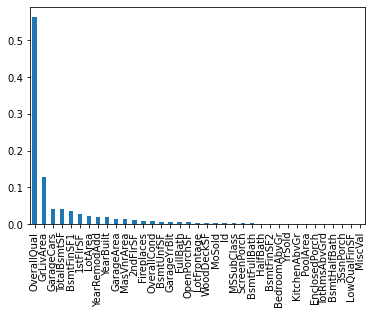

In [80]:
feature_important = pd.Series(full_feature_model.feature_importances_)
feature_important.index = X_train.columns
feature_important.sort_values(ascending=False, inplace=True)
feature_important.plot.bar()

In [85]:
features = list(feature_important.index)

first = features[0]
model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=11)
model.fit(X_train[first].to_frame(),y_train)

gen_r2_score = r2_score(y_test, model.predict(X_test[first].to_frame()))
gen_r2_score

0.6911164016397164

In [86]:
tol = 0.01
add_feature = [first]
for feat in features[1:]:
    model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=12)
    model.fit(X_train[add_feature + [feat]],y_train)
    add_r2_score = r2_score(y_test, model.predict(X_test[add_feature +[feat]]))
    diff = add_r2_score - gen_r2_score
    if diff >= tol:
        add_feature.append(feat)
        
model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=12)
model.fit(X_train[add_feature],y_train)
final = r2_score(y_test, model.predict(X_test[add_feature]))
    

In [87]:
final

0.8469313287650004

In [88]:
add_feature

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 'YearRemodAdd',
 'YearBuilt',
 'GarageArea',
 'MasVnrArea',
 '2ndFlrSF',
 'Fireplaces',
 'OverallCond',
 'BsmtUnfSF',
 'GarageYrBlt',
 'FullBath',
 'OpenPorchSF',
 'LotFrontage',
 'WoodDeckSF',
 'MoSold',
 'Id',
 'MSSubClass',
 'ScreenPorch',
 'BsmtFullBath',
 'HalfBath',
 'BsmtFinSF2',
 'BedroomAbvGr',
 'YrSold',
 'KitchenAbvGr',
 'PoolArea',
 'EnclosedPorch',
 'TotRmsAbvGrd',
 'BsmtHalfBath',
 '3SsnPorch',
 'LowQualFinSF',
 'MiscVal']

In [97]:
import pandas as pd 

import numpy as np 

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

from feature_engine.selection import SelectByShuffling



In [112]:
data = pd.read_csv("./houseprice.csv")
data.shape

(1460, 81)

In [113]:
numeric  = list(data.select_dtypes(include=["int16", "int32", "int64","float16", "float32","float64"]).columns)
data = data[numeric]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=["SalePrice","Id"],axis =1), data["SalePrice"], random_state=0, test_size=0.3)

In [115]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [116]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=5, n_jobs=4)


In [117]:
sel = SelectByShuffling(
    variables = None,
    estimator = rf,
    scoring = "neg_root_mean_squared_error",
    threshold = None,
    cv=3,
    random_state =1
)

sel.fit(X_train,y_train)

SelectByShuffling(estimator=RandomForestRegressor(max_depth=3, n_jobs=4,
                                                  random_state=5),
                  random_state=1, scoring='neg_root_mean_squared_error')

In [118]:
sel.initial_model_performance_

-37278.82051952684

In [119]:
sel.features_to_drop_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [120]:
X_train = sel.transform(X_train)

X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [121]:
rf.fit(X_train, y_train)

print("test rmse: ", mean_squared_error(y_test, rf.predict(X_test),squared=False))
print("train r2: ", r2_score(y_test, rf.predict(X_test)))


test rmse:  40764.806950830694
train r2:  0.7552258682030745


In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, RecursiveFeatureElimination
from sklearn.pipeline import Pipeline

In [124]:
data = pd.read_csv("./dataset_1.csv")
data.shape

(50000, 301)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'],axis=1),data["target"], test_size=0.3, random_state=0)

In [131]:
pipe = Pipeline(steps = [ 
    ("constant", DropConstantFeatures(tol=0.998)),
    ("duplicate",DropDuplicateFeatures())
                         ])
pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicate', DropDuplicateFeatures())])

In [137]:
model = GradientBoostingClassifier(n_estimators=10, max_depth= 2, random_state=10)

In [138]:
sel = RecursiveFeatureElimination(variables=None, estimator = model, scoring='roc_auc', threshold=0.0005, cv= 2)
sel.fit(X_train, y_train)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingClassifier(max_depth=2,
                                                                 n_estimators=10,
                                                                 random_state=10),
                            threshold=0.0005)

In [139]:
sel.initial_model_performance_


0.7989290508855801

In [140]:
sel.features_to_drop_

['var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_92',
 'var_93',
 'var_94

In [141]:
X_train = sel.transform(X_train)

In [143]:
X_train.shape

(35000, 5)

In [145]:
X_test = sel.transform(X_test)

<AxesSubplot:>

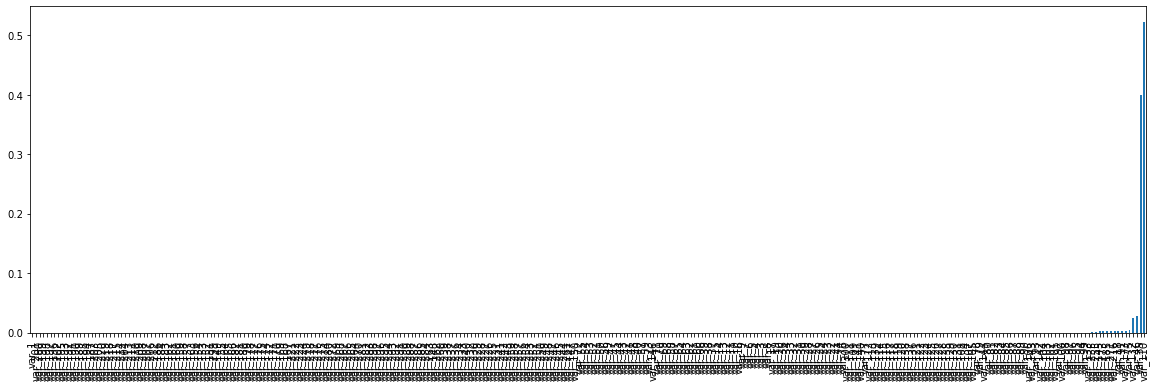

In [148]:
sel.feature_importances_.plot.bar(figsize=(20,6))

In [225]:
data = pd.read_csv('./houseprice.csv')

data.shape
numeric = ["int16", "int32", "int64", "float16", "float32", "float64"]
numerical_vars = list(data.select_dtypes(include= numeric).columns)
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=["SalePrice","Id"],axis=1), data["SalePrice"], test_size=0.3, random_state=10)

(1460, 81)

In [226]:
numeric = ["int16", "int32", "int64", "float16", "float32", "float64"]
numerical_vars = list(data.select_dtypes(include= numeric).columns)

In [227]:
data = data[numerical_vars]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=["SalePrice","Id"],axis=1), data["SalePrice"], test_size=0.3, random_state=10)

In [229]:
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [230]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [232]:
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

In [233]:
sel = RecursiveFeatureElimination(variables = None,estimator=model, threshold=0.001, cv=3,scoring='r2')
sel.fit(X_train, y_train)


RecursiveFeatureElimination(estimator=GradientBoostingRegressor(max_depth=4,
                                                                n_estimators=10,
                                                                random_state=10),
                            scoring='r2', threshold=0.001)

In [234]:
sel.features_to_drop_

['MasVnrArea', 'BsmtFinSF1', 'LowQualFinSF', 'BsmtHalfBath', 'TotRmsAbvGrd']

<AxesSubplot:>

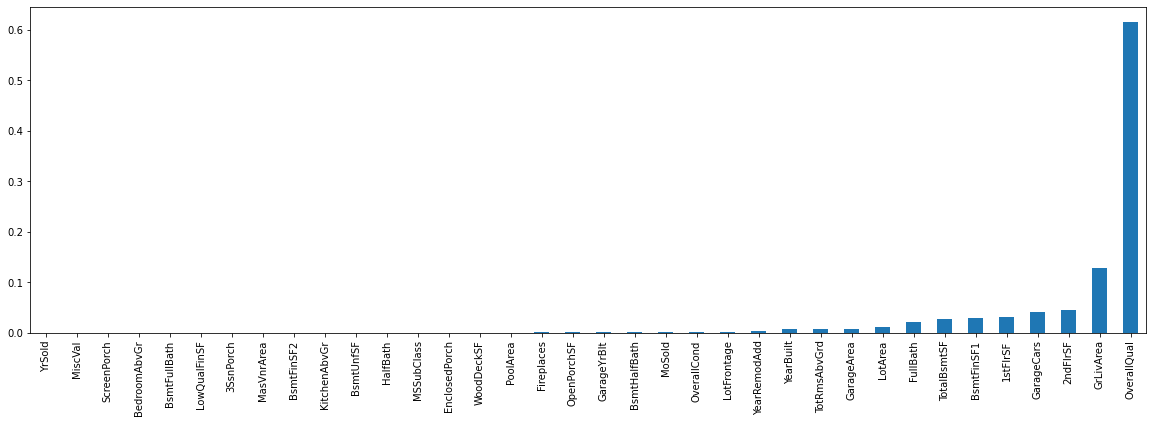

In [235]:
sel.feature_importances_.plot.bar(figsize=(20,6))

In [236]:
sel.initial_model_performance_

0.6896840652375101

In [237]:
X_train = sel.transform(X_train)
X_test =sel.transform(X_test)

In [238]:
X_train.shape

(1022, 31)

In [239]:
import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, KFold


In [240]:
data = pd.read_csv("./dataset_1.csv")

data.shape


(50000, 301)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'],axis=1),data["target"], test_size=0.3, random_state=0)

In [243]:
pipe = Pipeline(steps= [
    ("constant", DropConstantFeatures(tol=0.998)),
    ("duplicate", DropDuplicateFeatures())
                    ])
pipe.fit(X_train)


Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicate', DropDuplicateFeatures())])

In [ ]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)


In [244]:
model = GradientBoostingClassifier(n_estimators=10, max_depth=3, random_state=10)


In [246]:
from feature_engine.selection import RecursiveFeatureAddition
rfa = RecursiveFeatureAddition(estimator = model, scoring='roc_auc', cv=3, threshold=0.0001)
rfa.fit(X_train, y_train)

RecursiveFeatureAddition(estimator=GradientBoostingClassifier(n_estimators=10,
                                                              random_state=10),
                         threshold=0.0001)

In [247]:
rfa.initial_model_performance_

0.8165359408962664

<AxesSubplot:>

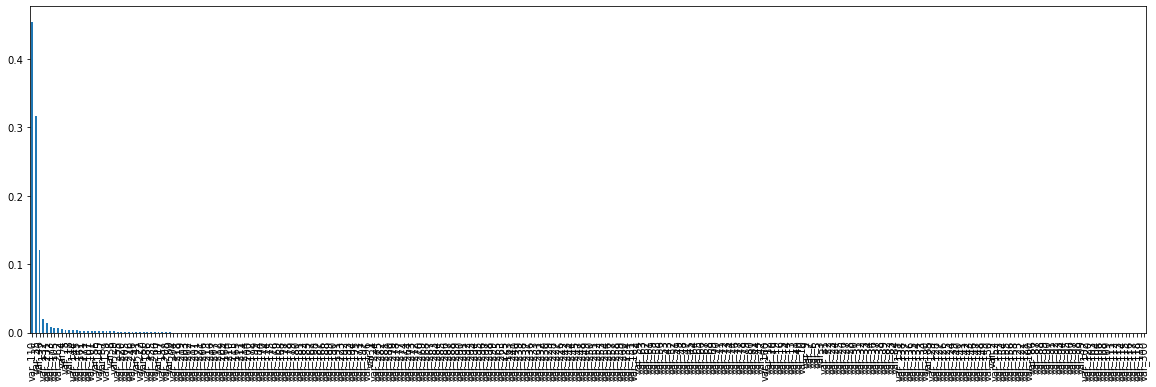

In [249]:
rfa.feature_importances_.plot.bar(figsize=(20,6))

In [251]:
len(rfa.features_to_drop_)

291

In [256]:
X_train = rfa.transform(X_train).shape
X_test = rfa.transform(X_test).shape

In [281]:
data = pd.read_csv('./houseprice.csv')

data.shape
numeric = ["int16", "int32", "int64", "float16", "float32", "float64"]
numerical_vars = list(data.select_dtypes(include= numeric).columns)

data = data[numerical_vars]
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=["SalePrice","Id"],axis=1), data["SalePrice"], test_size=0.3, random_state=10)

In [282]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [283]:
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

rfa = RecursiveFeatureAddition(estimator=model, scoring='r2', threshold=0.001, cv=2, variables=None)

rfa.fit(X_train, y_train)

RecursiveFeatureAddition(cv=2,
                         estimator=GradientBoostingRegressor(max_depth=4,
                                                             n_estimators=10,
                                                             random_state=10),
                         scoring='r2', threshold=0.001)

In [284]:
rfa.initial_model_performance_

0.6888197080509977

In [285]:
X_train  = rfa.transform(X_train)
X_test = rfa.transform(X_test)

In [286]:
X_test

,OverallQual,YearBuilt,BsmtFinSF1,2ndFlrSF,GrLivArea,Fireplaces,GarageArea
854,5,1955,306,0,1779,1,454
381,7,2006,0,0,1301,1,572
816,5,1954,486,0,1008,1,275
577,5,1966,328,0,1320,2,564
35,8,2004,0,1320,2452,1,691
...,...,...,...,...,...,...,...
657,7,1931,0,651,1502,1,270
411,5,1955,1056,0,1056,0,572
861,5,1965,841,0,1039,0,504
1175,8,1992,700,743,2872,1,541


In [288]:
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

0.6771559838461317

In [1]:
import numpy as np

import pandas as pd 

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import StandardScaler




In [2]:
data = pd.read_csv("./houseprice.csv")
data.shape

(1460, 81)

In [4]:
numerics = ["int16", 'int32', 'int64', 'float64', 'float32','float64']
numerical_vars = data.select_dtypes(include=numerics).columns
data = data[numerical_vars]

In [6]:
X_train, X_test, y_train, y_test =train_test_split(data.drop(labels=["SalePrice","Id"],axis=1),data["SalePrice"],test_size=0.3, random_state=0)

In [7]:
X_train.fillna(0, inplace =True)
X_test.fillna(0, inplace =True)


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
sel_ = SelectFromModel(Lasso(alpha = 100, random_state=10))
sel_.fit(scaler.transform(X_train),y_train)

SelectFromModel(estimator=Lasso(alpha=100, random_state=10))

In [15]:
selected_feat = X_train.columns[sel_.get_support()]

In [22]:
drop_feature = X_train.columns[sel_.estimator_.coef_==0]

In [25]:
drop_feature

Index(['BsmtUnfSF', '1stFlrSF', 'MiscVal'], dtype='object')